In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats

plt.style.use('seaborn')



import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime

%matplotlib inline

In [27]:
df_train= pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [28]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [29]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


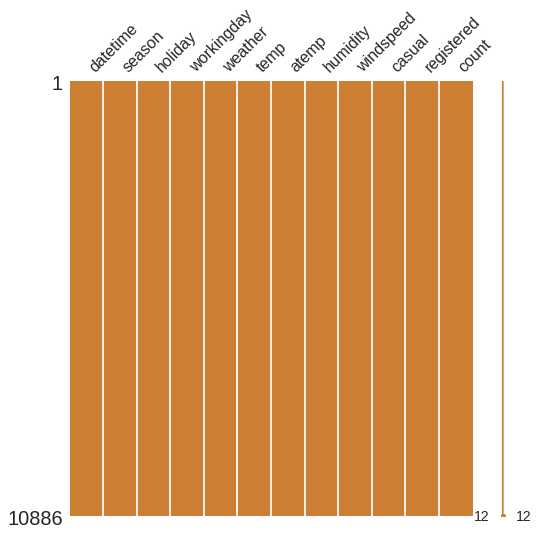

In [30]:
msno.matrix(df= df_train.iloc[: , :],figsize=(8,8), color = (0.8,0.5,0.2))

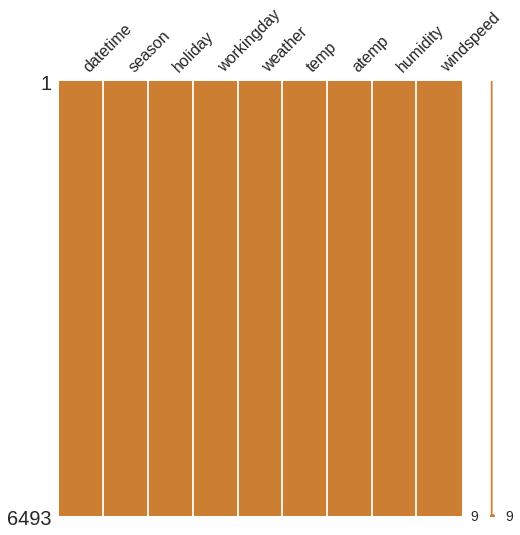

In [31]:
msno.matrix(df= df_test.iloc[: , :],figsize=(8,8), color = (0.8,0.5,0.2))

In [32]:
df_train[['season','count']].groupby(['season'], as_index=True).mean()

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


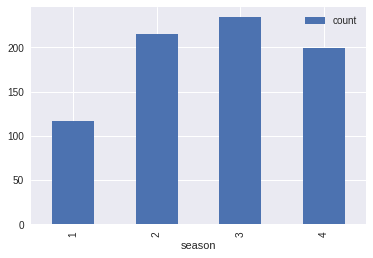

In [33]:
df_train[['season','count']].groupby(['season'], as_index=True).mean().plot.bar()

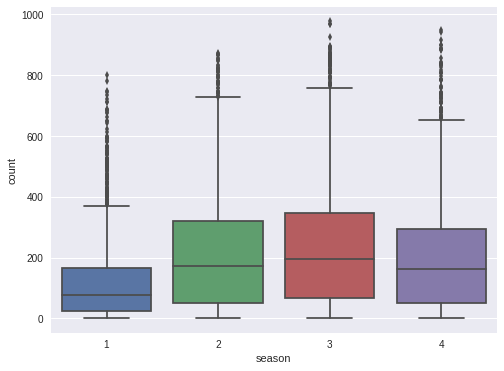

In [34]:
data = pd.concat([df_train['count'], df_train['season']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='season', y="count", data=data)

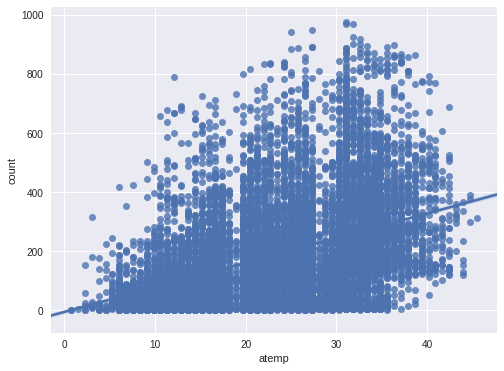

In [35]:
data = pd.concat([df_train['count'], df_train['atemp']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='atemp', y="count", data=data)

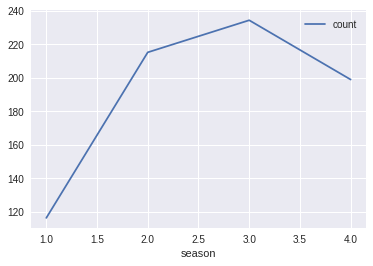

In [36]:
df_train[['season','count']].groupby(['season'], as_index=True).mean().plot()

In [37]:
ch=df_train

In [38]:
ch['date']  = ch.datetime.apply(lambda x: x.split()[0])
ch['hour'] = ch.datetime.apply(lambda x: x.split()[1].split(':')[0])

In [39]:
ch['weekday'] = ch.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
ch['month'] = ch.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)

In [40]:
#df_train.drop(['datetime'], axis=1, inplace=True)

In [41]:
ch['year']=[d.split('-')[0] for d in ch.date]
ch['day']=[d.split('-')[2] for d in ch.date]

In [42]:
ch['hour']=pd.to_numeric(ch['hour'])
ch['day']=pd.to_numeric(ch['day'])
ch['year']=pd.to_numeric(ch['year'])


In [43]:
ch.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
date           object
hour            int64
weekday         int64
month           int64
year            int64
day             int64
dtype: object

In [44]:
ch.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,year,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,0,5,1,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,5,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2,5,1,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,3,5,1,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,4,5,1,2011,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011-01-01,5,5,1,2011,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011-01-01,6,5,1,2011,1
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011-01-01,7,5,1,2011,1
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011-01-01,8,5,1,2011,1
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011-01-01,9,5,1,2011,1


In [45]:
y=[2011,2012]
m=list(range(1,13))
d=list(range(1,20))
h=list(range(0,24))


In [46]:
#for row_num in list(range(0,len(ch))):
#    print(ch['day'].loc[row_num])
#

In [47]:
y=[2011,2012]
m=list(range(1,13))
d=list(range(1,20))
h=list(range(0,24))


In [48]:
#i=0
#for row_num in list(range(0,len(ch))):
#    h=list(range(i,i+24))
#        if ch['hour'][row_num]%24==h[ch['hour'][row_num]%24]:
#            continue
        

In [49]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,year,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,5,1,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,5,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,5,1,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,5,1,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,5,1,2011,1


In [50]:
#plt.boxplot(out['windspeed'])

# 왜도,첨도

Skewness: 0.003691
Kurtosis: -0.914530


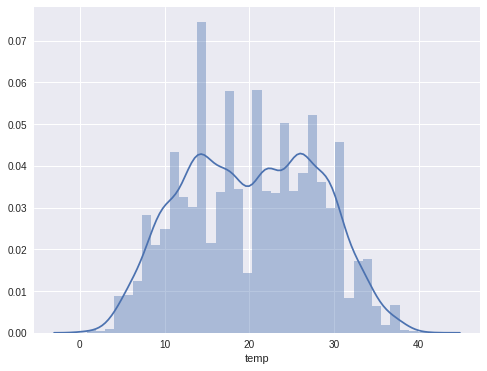

In [51]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['temp'])
print("Skewness: %f" % df_train['temp'].skew())
print("Kurtosis: %f" % df_train['temp'].kurt())

Skewness: -0.102560
Kurtosis: -0.850076


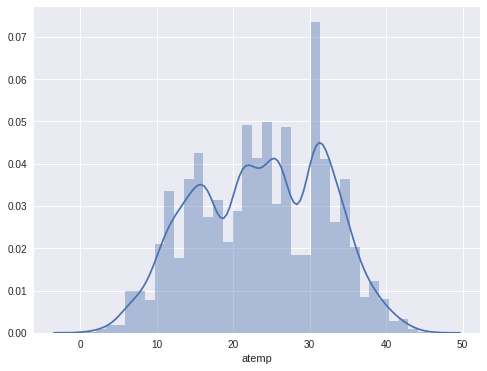

In [52]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['atemp'])
print("Skewness: %f" % df_train['atemp'].skew())
print("Kurtosis: %f" % df_train['atemp'].kurt())

Skewness: -0.086335
Kurtosis: -0.759818


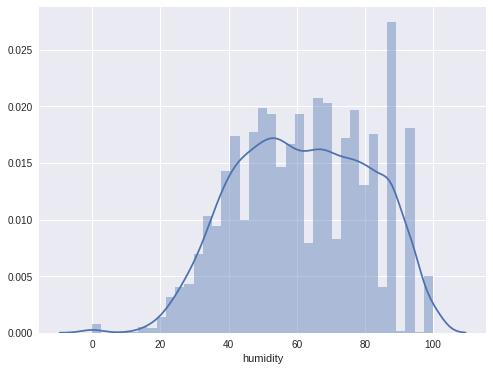

In [53]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['humidity'])
print("Skewness: %f" % df_train['humidity'].skew())
print("Kurtosis: %f" % df_train['humidity'].kurt())

Skewness: 0.588767
Kurtosis: 0.630133


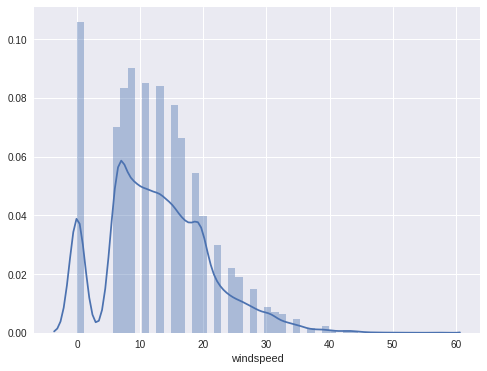

In [54]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['windspeed'])
print("Skewness: %f" % df_train['windspeed'].skew())
print("Kurtosis: %f" % df_train['windspeed'].kurt())

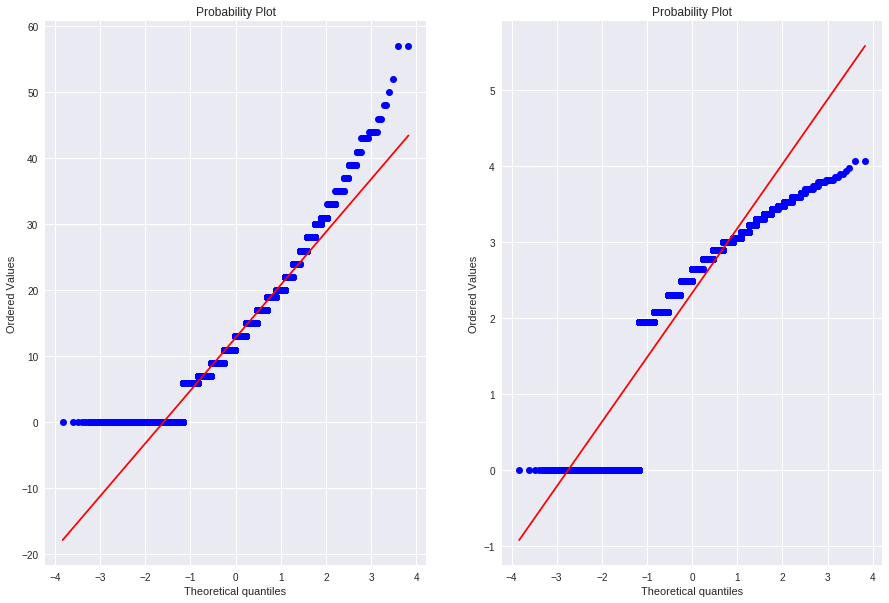

In [55]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['windspeed'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['windspeed']), plot=plt)

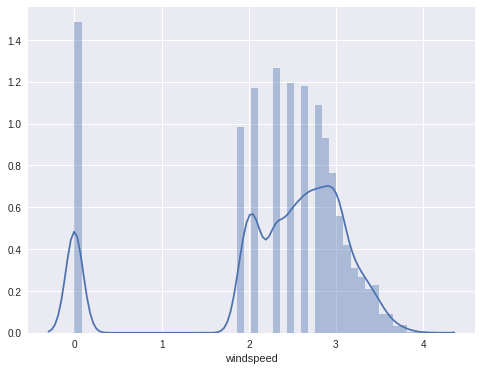

In [56]:
df_train['windspeed'] = np.log1p(df_train['windspeed'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['windspeed'])

Skewness: 1.242066
Kurtosis: 1.300093


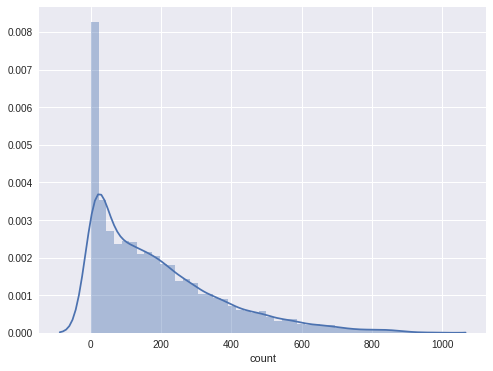

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['count'])
print("Skewness: %f" % df_train['count'].skew())
print("Kurtosis: %f" % df_train['count'].kurt())

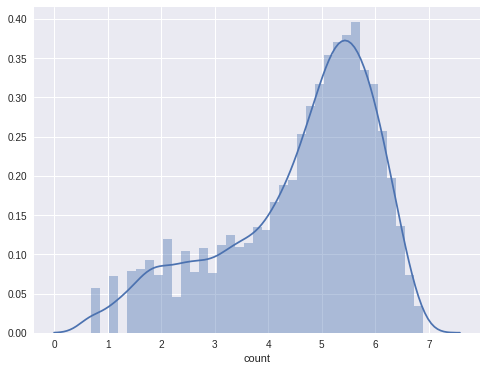

In [58]:
df_train['count'] = np.log1p(df_train['count'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['count'])

['count' 'registered' 'casual' 'hour' 'temp' 'atemp' 'humidity' 'year'
 'month' 'season']


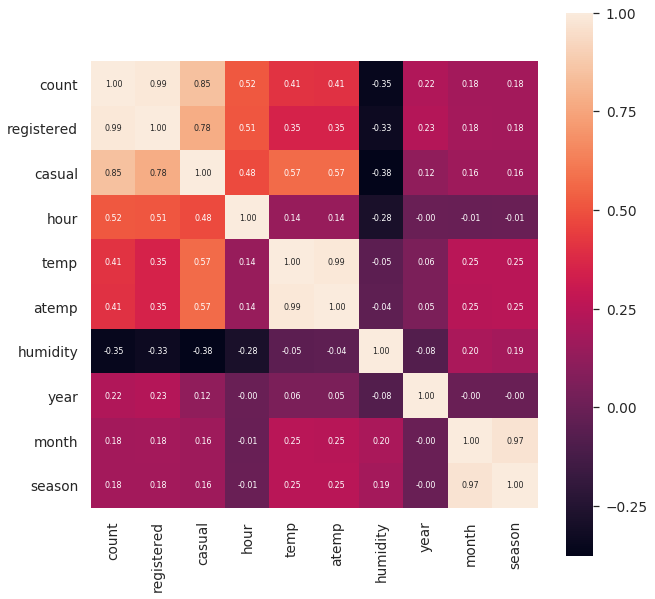

In [59]:
import scipy as sp

cor_abs = abs(df_train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='count').index # count과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)